# Final Test Set Evaluation for C. Diff Prediction Models

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, auc, classification_report


In [3]:
test_df = pd.read_csv("training_data_imputed_simple_TEST.csv.gz")

X_test = test_df.drop([
    'cdiff_2d_flag', 'cdiff_7d_flag', 'cdiff_30d_flag', 'cdiff_survival_flag', 'survival_time', 'cdiff_label_icd9_2d', 'cdiff_label_elisa_2d', 'cdiff_label_icd9_30d', 'cdiff_label_icd9_7d', 'cdiff_label_elisa_30d', 'cdiff_label_elisa_7d'], axis=1)
y_test_30 = test_df['cdiff_30d_flag']

y_test_30.value_counts()

cdiff_30d_flag
0.0    21188
1.0     1392
Name: count, dtype: int64

## AUROC

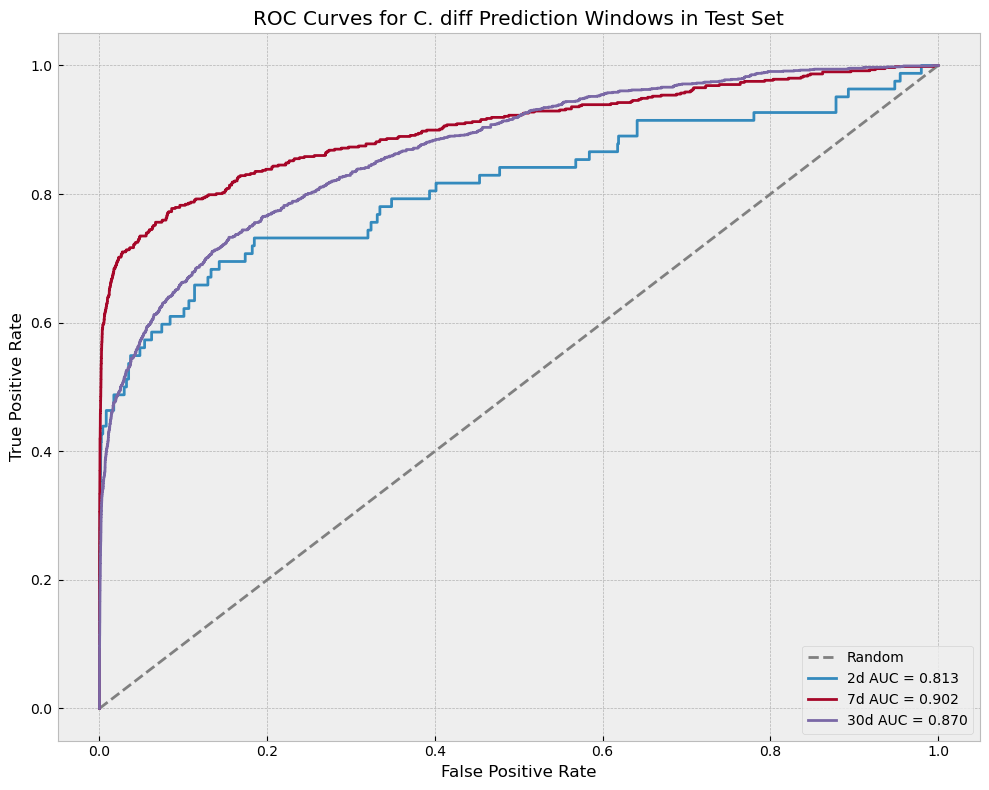

In [4]:
windows = ['2d', '7d', '30d']
plt.figure(figsize=(10, 8))
plt.style.use('bmh')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random")
for window in windows:
    xgb_model = xgb.XGBClassifier()
    xgb_model.load_model(f'{window}_best_model.json')
    y_true = test_df[f'cdiff_{window}_flag']

    y_test_pred = xgb_model.predict(X_test)
    y_test_prob = xgb_model.predict_proba(X_test)[:, 1]  

    fpr, tpr, thresholds = roc_curve(y_true, y_test_prob)
    auc_score = roc_auc_score(y_true, y_test_prob)

    plt.step(fpr, tpr, label=f"{window} AUC = {auc_score:.3f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves for C. diff Prediction Windows in Test Set")
    plt.legend(loc="lower right")
    plt.tight_layout()
plt.show()

## AUPRC

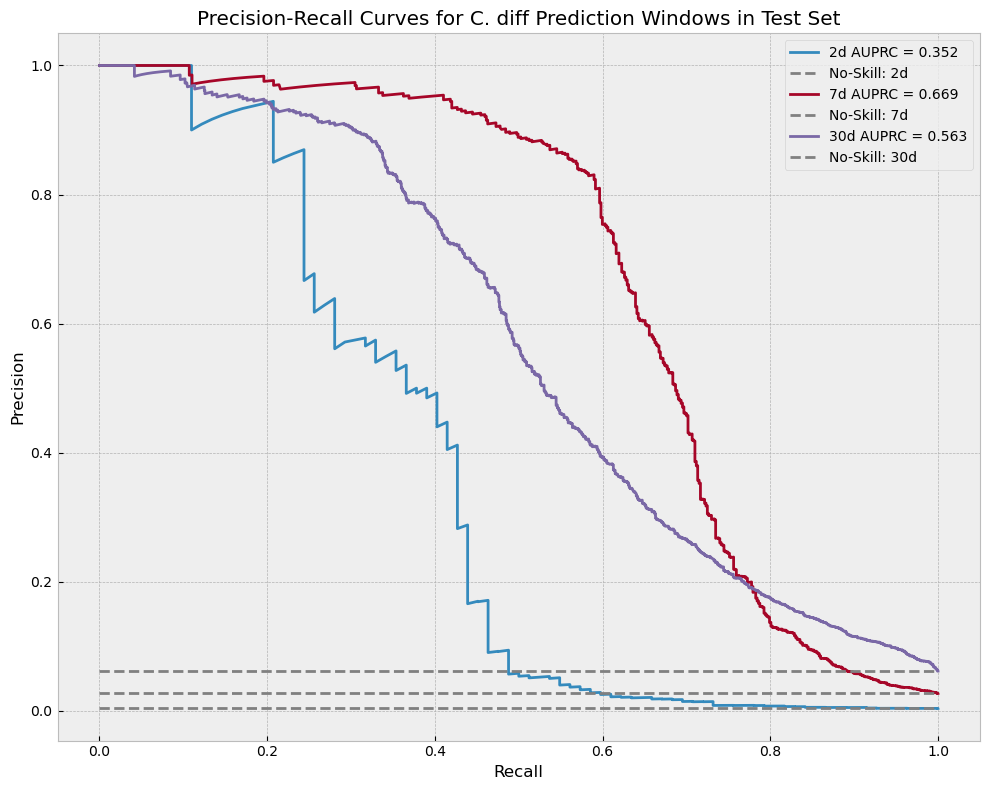

In [5]:
windows = ['2d', '7d', '30d']
plt.figure(figsize=(10, 8))
plt.style.use('bmh')
for window in windows:
    xgb_model = xgb.XGBClassifier()
    xgb_model.load_model(f'{window}_best_model.json')
    y_true = test_df[f'cdiff_{window}_flag']

    y_test_pred = xgb_model.predict(X_test)
    y_test_prob = xgb_model.predict_proba(X_test)[:, 1]  


    precision, recall, thresholds = precision_recall_curve(y_true, y_test_prob)
    auprc_score = average_precision_score(y_true, y_test_prob)

    case_rate = y_true.sum() / len(y_true)

    plt.plot(recall, precision, label=f"{window} AUPRC = {auprc_score:.3f}")
    plt.plot([0, 1], [case_rate, case_rate], linestyle='--', color='gray', label=f"No-Skill: {window}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curves for C. diff Prediction Windows in Test Set")
    plt.legend(loc="upper right")
    plt.tight_layout()
plt.show()